<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/chaw_06492_ch501_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

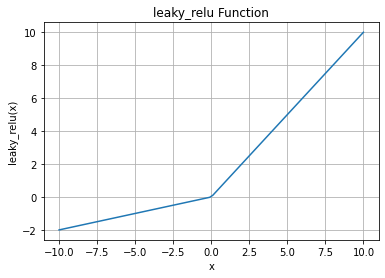

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.linspace(-10.,10.,100)
y = tf.nn.leaky_relu(x, alpha = 0.2)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("leaky_relu(x)")
plt.title("leaky_relu Function")
plt.grid()
plt.show()

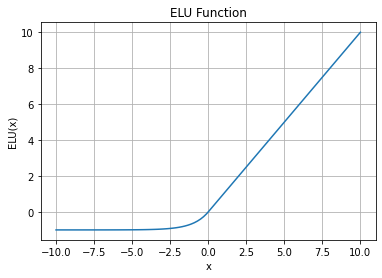

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.linspace(-10.,10.,100)
y = tf.nn.elu(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("ELU(x)")
plt.title("ELU Function")
plt.grid()
plt.show()

In [3]:
import tensorflow as tf

# 創建 W,b 張量
x = tf.random.normal([3,784])
w1 = tf.Variable(tf.random.truncated_normal([784, 10], stddev=0.1))
b1 = tf.Variable(tf.zeros([10]))
o1 = tf.matmul(x,w1) + b1   # 線性變換
o1 = tf.nn.relu(o1)         # 加上激活函數
print(o1.shape)   # 印出輸出大小

(3, 10)


In [4]:
import tensorflow as tf

# 創建 W,b 張量
x = tf.random.normal([3,784])
# 隱藏層 1權重與偏移值設定
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 隱藏層 2權重與偏移值設定
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
# 隱藏層 3權重與偏移值設定
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
# 輸出層權重與偏移值設定
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))
# 前向計算
o1 = x@w1 + b1
s1 = tf.nn.sigmoid(o1)
o2 = s1@w2 + b2
s2 = tf.nn.sigmoid(o2)
o3 = s2@w3 + b3
s3 = tf.nn.sigmoid(o3)
o4 = s3@w4 + b4

print(o4.shape)

(3, 10)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers  # 導入 layer 類

x = tf.random.normal([3,784])
fc = layers.Dense(10,activation=tf.nn.relu)
out = fc(x)   # 輸入ｘ進行一次前向計算，返回輸出張量
print(out.shape)
print("kernel :",fc.kernel)  # 印出 Dense 的權重矩陣
print("bias :",fc.bias)    # 印出 Dense 的偏移值矩陣

(3, 10)
kernel : <tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
array([[-0.04546879,  0.00355165, -0.02703358, ..., -0.05474752,
        -0.06822664,  0.06155301],
       [-0.07027832,  0.00938943,  0.08672579, ..., -0.03595608,
        -0.02529544, -0.02199288],
       [ 0.08599991,  0.07680663, -0.07193521, ...,  0.02287073,
         0.08094   ,  0.02968866],
       ...,
       [-0.07305373, -0.08658289, -0.00315046, ...,  0.07609967,
        -0.08611777,  0.05608907],
       [ 0.06527971, -0.02659594,  0.08096885, ..., -0.00997049,
         0.01611316,  0.08597017],
       [ 0.00792606,  0.05925094,  0.05608495, ..., -0.03024059,
        -0.08275352, -0.00289768]], dtype=float32)>
bias : <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


In [6]:
import tensorflow as tf
from tensorflow.keras import layers  # 導入 layer 類

fc1 = layers.Dense(256,activation=tf.sigmoid)  # 隱藏層 1
fc2 = layers.Dense(128,activation=tf.sigmoid)  # 隱藏層 2
fc3 = layers.Dense(64,activation=tf.sigmoid)  # 隱藏層 3
fc4 = layers.Dense(10,activation=None)  # 輸出層

x = tf.random.normal([3,784])
h1 = fc1(x)
h2 = fc2(h1)
h3 = fc3(h2)
out = fc4(h3)
print(out.shape)   # 輸出網路輸出維度大小

(3, 10)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential  # 導入 layer 類

x = tf.random.normal([3,784])
# 通過 Sequential 容器封裝為一個網路類
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(10, activation=None),
])
out = model(x)     # 前向計算得到輸出
print(out.shape)

(3, 10)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential  # 導入 layer 類

x = tf.random.normal([3,784])
model = Sequential([])  # 創建一個空的網路容器
model.add(layers.Dense(256, activation=tf.nn.relu))  # 加入隱藏層 1
model.add(layers.Dense(128, activation=tf.nn.relu))  # 加入隱藏層 2
model.add(layers.Dense(64, activation=tf.nn.relu))   # 加入隱藏層 3
model.add(layers.Dense(10, activation=None))    # 加入輸出層

out = model(x)
print(out.shape)
print(model.summary())  # 輸出模型各層狀況

(3, 10)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (3, 256)                  200960    
                                                                 
 dense_10 (Dense)            (3, 128)                  32896     
                                                                 
 dense_11 (Dense)            (3, 64)                   8256      
                                                                 
 dense_12 (Dense)            (3, 10)                   650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
import tensorflow as tf
from tensorflow.keras import layers  # 導入 layer 類

class netModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        # 創建四個全連接網路
        self.fc1 = layers.Dense(256, activation=tf.nn.relu)
        self.fc2 = layers.Dense(128, activation=tf.nn.relu)
        self.fc3 = layers.Dense(64, activation=tf.nn.relu)
        self.fc4 = layers.Dense(10)

    def call(self, inputs, training=None, mask=None):
        # 撰寫網路各層順序
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        out = self.fc4(x)
        return out

input = tf.random.normal([3,784])
myModel = netModel()   # 建立網路
out = myModel(input)
print(myModel.summary())   # 印出網路架構訊息
print(out.shape)  # 將輸出維度大小印出


Model: "net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            multiple                  200960    
                                                                 
 dense_14 (Dense)            multiple                  32896     
                                                                 
 dense_15 (Dense)            multiple                  8256      
                                                                 
 dense_16 (Dense)            multiple                  650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None
(3, 10)


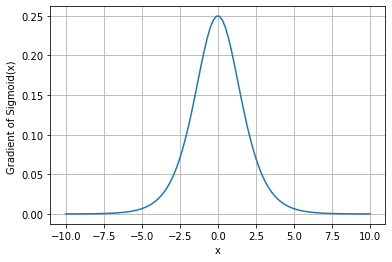

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

a = tf.Variable(tf.linspace(-10.,10.,100))
#
with tf.GradientTape() as tape:
    y = tf.sigmoid(a)
da = tape.gradient(y,a)

plt.plot(a.numpy(),da.numpy()) # tensor 轉 numpy
plt.xlabel("x")
plt.ylabel("Gradient of Sigmoid(x) ")
plt.grid()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
train data= 60000
test data= 10000
train data dim= (60000, 28, 28)
train label dim= (60000,)


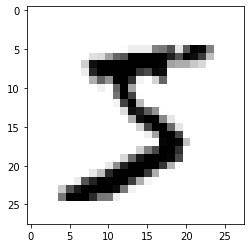

train_Label[0] 5
Testloss: 2.300350, Testaccuracy: 0.101500
0
Testloss: 2.298833, Testaccuracy: 0.101800
1
Testloss: 2.297259, Testaccuracy: 0.102000
2
Testloss: 2.295614, Testaccuracy: 0.102500
3
Testloss: 2.293885, Testaccuracy: 0.103800
4
Testloss: 2.292055, Testaccuracy: 0.107500
5
Testloss: 2.290106, Testaccuracy: 0.114200
6
Testloss: 2.288014, Testaccuracy: 0.125700
7
Testloss: 2.285757, Testaccuracy: 0.142200
8
Testloss: 2.283309, Testaccuracy: 0.161700
9
Testloss: 2.280636, Testaccuracy: 0.179200
10
Testloss: 2.277697, Testaccuracy: 0.195600
11
Testloss: 2.274446, Testaccuracy: 0.208000
12
Testloss: 2.270829, Testaccuracy: 0.219500
13
Testloss: 2.266766, Testaccuracy: 0.228600
14
Testloss: 2.262172, Testaccuracy: 0.239900
15
Testloss: 2.256917, Testaccuracy: 0.252300
16
Testloss: 2.250851, Testaccuracy: 0.267000
17
Testloss: 2.243781, Testaccuracy: 0.282900
18
Testloss: 2.235537, Testaccuracy: 0.301000
19
Testloss: 2.225981, Testaccuracy: 0.316600
20
Testloss: 2.215079, Testacc

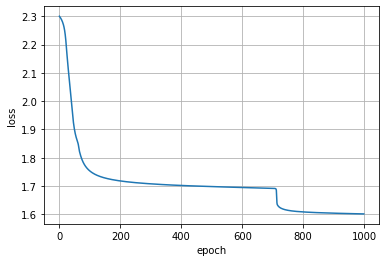

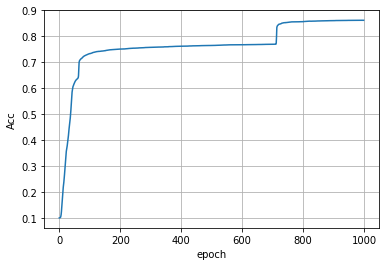

In [11]:
# 匯入Keras的mnist模組
from tensorflow.keras.datasets import mnist
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

# 查看 mnist 資料集大小
print('train data=', len(train_Data))
print('test data=', len(test_Data))
# 查看 mnist 資料集維度
print('train data dim=', train_Data.shape)
print('train label dim=', train_Label.shape)

import matplotlib.pyplot as plt  # 匯入matplotlib.pyplot模組

def plot_image(data):  # 輸入的是要繪製的圖象或者是陣列
    fig = plt.gcf() # 獲取當前圖形對象
    fig.set_size_inches(4,4)  # 設定圖像大小(單位:英吋)
    plt.imshow(data, cmap='binary')  # 設定顯示圖片以及顯示方式
    plt.show() # 顯示圖片

plot_image(train_Data[0])

print('train_Label[0]', train_Label[0])

import tensorflow as tf

# 訓練參數設定
learning_rate = 0.01     # 學習律
training_epoch = 1000    # 訓練次數
batch_size = 2000         # 每次訓練大小

# MNIST 資料的前置處裡
# 將原本是 28x28 的影像大小攤平成 784, 拿來當輸入特徵.
train_Data_R, test_Data_R = train_Data.reshape([-1, 784]).astype('float32')\
    ,test_Data.reshape([-1, 784]).astype('float32')
# 資料正規化
train_Data_R, test_Data_R = train_Data_R / 255., test_Data_R / 255.
# 將資料分批並且打散
train_Data_M = tf.data.Dataset.from_tensor_slices((train_Data_R, train_Label))
train_Data_M = train_Data_M.shuffle(5000).batch(batch_size)

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# 隨機梯度下降優化器。
optimizer = tf.keras.optimizers.SGD(learning_rate)

def cross_entropy_loss(x, y):
    # 將標籤轉換為 int 64。
    y = tf.cast(y, tf.int64)
    # 選擇交叉熵當損失函數.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # 計算平均損失
    return tf.reduce_mean(loss)

# 計算準確率
def accuracy(y_pred, y_true):
    # tf.argmax(y_pred, 1) 返回 y_pred 維度為 1 的最大索引跟正確值做比較
    correct_prediction = tf.equal(tf.argmax(y_pred, 1),
                                  tf.cast(y_true, tf.int64))
    # 計算平均正確率
    return tf.reduce_mean(tf.cast(correct_prediction,
                                  tf.float32), axis=-1)


testlossArr = []   # 記錄每一個 epoch 的損失值
testaccArr = []   # 記錄每一個 epoch 的正確率
epochs = []   # 記錄每一個 epoch 值
Testloss = 0  # 記錄測試集當下 epoch 的損失值
Testacc = 0   # 記錄測試集當下 epoch 的正確率
epoch = 0
for epoch in range(training_epoch):
    for step, (batch_data, batch_label) in enumerate(train_Data_M):
        with tf.GradientTape() as tape:
            pre_data = model(batch_data)
            # Compute loss.
            loss = cross_entropy_loss(pre_data, batch_label)
            acc = accuracy(pre_data, batch_label)
            trainable_variables = model.trainable_variables
            # 計算梯度
            gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

    # 每訓練完一個 EPOCH, 就拿測試集來測試準確率
    Testprec = model(test_Data_R)
    Testloss = cross_entropy_loss(Testprec, test_Label)
    Testacc = accuracy(Testprec, test_Label)
    print("Testloss: %f, Testaccuracy: %f" % (Testloss, Testacc))
    print(epoch)
    testlossArr.append(Testloss)
    testaccArr.append(Testacc)
    epochs.append(epoch)


plt.plot(epochs,testlossArr)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
plt.plot(epochs,testaccArr)
plt.xlabel("epoch")
plt.ylabel("Acc")
plt.grid()
plt.show()